### remember that this dataset is a filtered version of the coco dataset, so its annotations contain only people and animals

In [8]:
import json
import matplotlib.pyplot as plt
import cv2

In [2]:
with open('coco_annotation.json', 'r') as f:
    data = json.load(f)
    

In [3]:
data.keys()

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])

In [211]:
data['images'][1]

{'license': 4,
 'file_name': '000000252219.jpg',
 'coco_url': 'http://images.cocodataset.org/val2017/000000252219.jpg',
 'height': 428,
 'width': 640,
 'date_captured': '2013-11-14 22:32:02',
 'flickr_url': 'http://farm4.staticflickr.com/3446/3232237447_13d84bd0a1_z.jpg',
 'id': 252219}

In [241]:
i = 4
filename = data['images'][i]['file_name']
filename

'000000296649.jpg'

#### each annotation is for a separate bbox/segment. so for an image with multiple bboxes, there're multiple annotations

In [242]:
data['annotations'][1]

{'segmentation': [[492.38,
   238.33,
   491.91,
   234.15,
   494.47,
   227.65,
   495.17,
   215.1,
   497.02,
   199.54,
   503.53,
   197.22,
   503.3,
   194.43,
   503.3,
   190.95,
   506.08,
   183.51,
   511.89,
   185.84,
   514.21,
   187.0,
   514.21,
   196.29,
   521.88,
   200.7,
   526.76,
   216.03,
   520.25,
   227.65,
   519.56,
   234.38,
   519.09,
   239.49,
   519.09,
   244.84,
   519.56,
   246.93,
   518.16,
   248.32,
   516.3,
   256.91,
   510.03,
   256.45,
   513.28,
   240.89]],
 'area': 1394.7431000000001,
 'iscrowd': 0,
 'image_id': 440475,
 'bbox': [491.91, 183.51, 34.85, 73.4],
 'category_id': 1,
 'id': 183302}

#### use this to get some image ids for testing

In [64]:
index = 6 # change the index value
imidone = annot_imidlist[index]
for i,imid in enumerate(annot_imidlist):
    if imid == imidone:
        print(i, imid)

6 309391
10 309391
58 309391
116 309391
126 309391
453 309391
627 309391
748 309391
775 309391
783 309391
805 309391
821 309391
829 309391
11537 309391


In [55]:
def viz_coco(img_id = 69213):
    with open('coco_annotation.json', 'r') as f:
        data = json.load(f)
    
    imid_zerofill = str(img_id).zfill(12)
    filename = f'{imid_zerofill}.jpg'
    image = cv2.imread(f'../images/{filename}')
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    annotations = data['annotations']    
    for annot in annotations:
        if annot['image_id'] == img_id:
            bbox = annot['bbox']
            xmin, ymin, width, height = map(int, bbox)
            category = 'person' if annot['category_id'] == 1 else 'animal' 
            cv2.putText(image, category, (xmin, ymin-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2)
            cv2.rectangle(image, (xmin, ymin), (xmin+width, ymin+height), (255, 255, 255), 1)
                
    
    plt.figure(figsize=(10,7))
    plt.imshow(image)

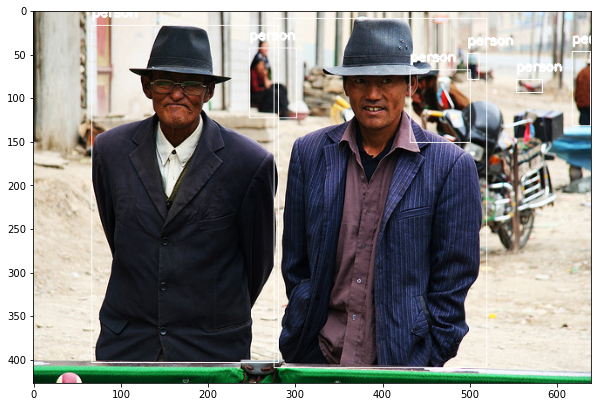

In [56]:
viz_coco(69213)

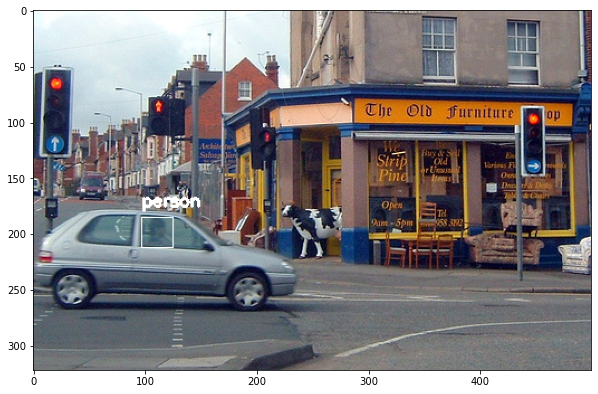

In [58]:
viz_coco(555050)

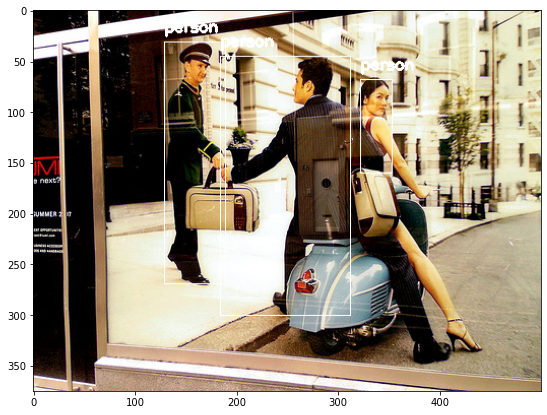

In [60]:
viz_coco(292456)

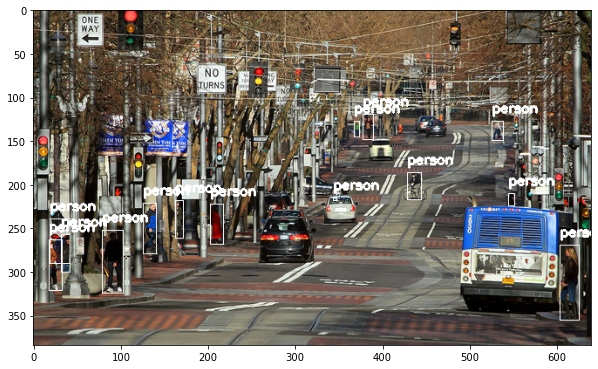

In [62]:
viz_coco(309391)

### appendix

In [34]:
x = 0
print(x)
for annot in annotations:
    x += 1
    if int(annot['image_id']) == int(555050):
        print(annot['bbox'])
        print(x)
print(x)

0
[97.1, 185.73, 28.66, 27.72]
5
11759


In [25]:
annot_imidlist = []
for annot in annotations:
    x += 1
    annot_imidlist.append(annot['image_id'])

In [61]:
imidone = annot_imidlist[6]
for i,imid in enumerate(annot_imidlist):
    if imid == imidone:
        print(i, imid)

6 309391
10 309391
58 309391
116 309391
126 309391
453 309391
627 309391
748 309391
775 309391
783 309391
805 309391
821 309391
829 309391
11537 309391


In [27]:
len(annot_imidlist)

11759

In [29]:
len(set(annot_imidlist))

2909

In [31]:
print(type(annot_imidlist[0]))

<class 'int'>


[491.91, 183.51, 34.85, 73.4]


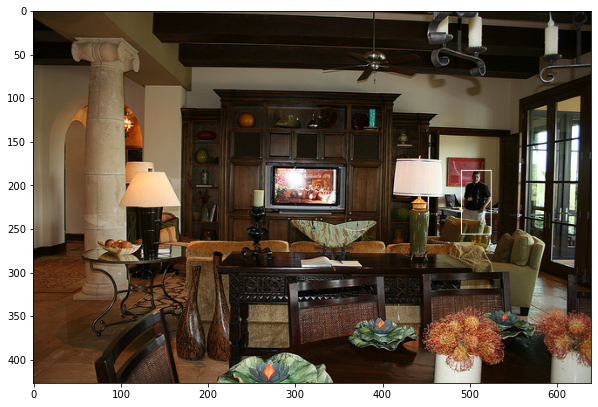

In [16]:
viz_coco(440475)

In [230]:
data.keys()

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])

In [232]:
len(data['images'])

2909

In [259]:
len(data['annotations'])

11759

In [236]:
data['annotations'][1]

{'segmentation': [[492.38,
   238.33,
   491.91,
   234.15,
   494.47,
   227.65,
   495.17,
   215.1,
   497.02,
   199.54,
   503.53,
   197.22,
   503.3,
   194.43,
   503.3,
   190.95,
   506.08,
   183.51,
   511.89,
   185.84,
   514.21,
   187.0,
   514.21,
   196.29,
   521.88,
   200.7,
   526.76,
   216.03,
   520.25,
   227.65,
   519.56,
   234.38,
   519.09,
   239.49,
   519.09,
   244.84,
   519.56,
   246.93,
   518.16,
   248.32,
   516.3,
   256.91,
   510.03,
   256.45,
   513.28,
   240.89]],
 'area': 1394.7431000000001,
 'iscrowd': 0,
 'image_id': 440475,
 'bbox': [491.91, 183.51, 34.85, 73.4],
 'category_id': 1,
 'id': 183302}

In [243]:
bbox = data['annotations'][i]['bbox']
bbox

[97.1, 185.73, 28.66, 27.72]

In [244]:
xmin, ymin, width, height = map(int, bbox)

In [245]:
xmin, ymin, width, height

(97, 185, 28, 27)

In [246]:
import cv2

In [247]:
data['annotations'][i]['image_id']

555050

In [248]:
imid = data['annotations'][i]['image_id']
filename = f'000000{imid}.jpg'

In [249]:
im = cv2.imread(f'../images/{filename}')

In [250]:
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

In [251]:
filename

'000000555050.jpg'

In [252]:
im.shape

(322, 500, 3)

In [253]:
out = cv2.rectangle(im, (xmin, ymin), (xmin+width, ymin+height), (255, 255, 255), 1)

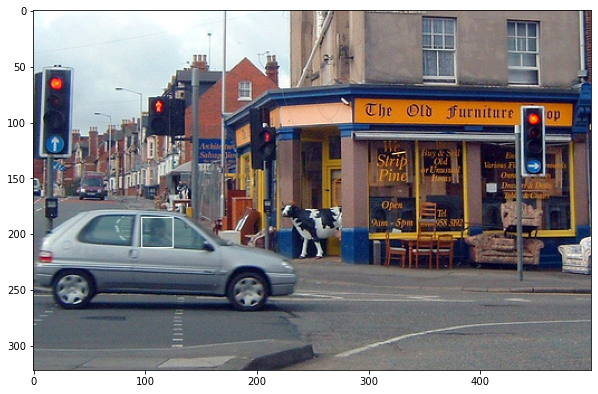

In [254]:
plt.figure(figsize=(10,7))
plt.imshow(out)

In [ ]:
data['annotations']